<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#data-distribution" data-toc-modified-id="data-distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>data distribution</a></span></li><li><span><a href="#viewing-an-image" data-toc-modified-id="viewing-an-image-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>viewing an image</a></span></li></ul></li><li><span><a href="#EfficientNet" data-toc-modified-id="EfficientNet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EfficientNet</a></span><ul class="toc-item"><li><span><a href="#fruits-360-original-size" data-toc-modified-id="fruits-360-original-size-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>fruits-360-original-size</a></span></li><li><span><a href="#fruits-360_dataset" data-toc-modified-id="fruits-360_dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>fruits-360_dataset</a></span></li></ul></li><li><span><a href="#AWS" data-toc-modified-id="AWS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AWS</a></span><ul class="toc-item"><li><span><a href="#charger-une-image" data-toc-modified-id="charger-une-image-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>charger une image</a></span></li><li><span><a href="#charger-le-paquet-de-traitement-d'image-local" data-toc-modified-id="charger-le-paquet-de-traitement-d'image-local-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>charger le paquet de traitement d'image local</a></span></li><li><span><a href="#charger-le-paquet-de-traitement-d'image-de-s3" data-toc-modified-id="charger-le-paquet-de-traitement-d'image-de-s3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>charger le paquet de traitement d'image de s3</a></span></li></ul></li></ul></div>

In [86]:
from random import randrange
import numpy as np
import pandas as pd 

import os
from os import path
import glob
import shutil
import time

import matplotlib.pyplot as plt
from matplotlib.image import imread

from cv2 import cv2
from cv2 import resize
import PIL
from PIL import Image, ImageDraw, ImageOps, ImageFilter

from sklearn import cluster
from sklearn import decomposition
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [87]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}


# Local repositories
LOCAL_SRC_PATH = '.\\data\\fruits-360-original-size\\'
LOCAL_DEST_PATH = '.\\data\\fruits-360_dataset\\fruits-360\\'



# Data
## load data

In [88]:
def rep_2_picture_info(path):

    # Initiate Dataframe with Dataset names, Target class names and Picture names
    df = pd.DataFrame(columns = ['FullFileName', 'Dataset', 'Target', 'Picture', 'FileSize (in KB)']) 

    for file in glob.iglob(path+'**/*.jpg', recursive = True):
        lst = file.split('\\')
        # update DataFrame
        if len(lst)==7 :
            lst.append(os.path.getsize(file) / 1024)  # in KBytes  
            lst[0] = lst[0] + "/" + lst[1] + "/" + lst[2] + "/" + lst[3] + "/" + lst[4] + "/" + lst[5] + "/" + lst[6]
            del lst[1]
            del lst[1]
            del lst[1]
        else:
            lst.append(os.path.getsize(file) / 1024)  # in KBytes  
            lst[0] = lst[0] + "/" + lst[1] + "/" + lst[2] + "/" + lst[3] + "/" + lst[4] + "/" + lst[5]
            del lst[1]
            del lst[1]
            
        df.loc[len(df)] = lst

    return df

In [89]:
df_main = pd.DataFrame(rep_2_picture_info(LOCAL_SRC_PATH))
df_main

FullFileName     Dataset  \
0      ./data/fruits-360-original-size/Test/apple_6/r...        Test   
1      ./data/fruits-360-original-size/Test/apple_6/r...        Test   
2      ./data/fruits-360-original-size/Test/apple_6/r...        Test   
3      ./data/fruits-360-original-size/Test/apple_6/r...        Test   
4      ./data/fruits-360-original-size/Test/apple_6/r...        Test   
...                                                  ...         ...   
12450  ./data/fruits-360-original-size/Validation/zuc...  Validation   
12451  ./data/fruits-360-original-size/Validation/zuc...  Validation   
12452  ./data/fruits-360-original-size/Validation/zuc...  Validation   
12453  ./data/fruits-360-original-size/Validation/zuc...  Validation   
12454  ./data/fruits-360-original-size/Validation/zuc...  Validation   

                Target     Picture  FileSize (in KB)  
0              apple_6  r0_103.jpg         15.641602  
1              apple_6  r0_107.jpg         15.830078  
2              apple_6   r0_11.jpg         16.173828  
3              apple_6  r0_111.jpg         15.923828  
4              apple_6  r0_115.jpg         16.184570  
...                ...         ...               ...  
12450  zucchini_dark_1   r0_85.jpg         39.062500  
12451  zucchini_dark_1   r0_89.jpg         40.337891  
12452  zucchini_dark_1    r0_9.jpg         33.859375  
12453  zucchini_dark_1   r0_93.jpg         39.890625  
12454  zucchini_dark_1   r0_97.jpg         37.627930  

[12455 rows x 5 columns]

In [90]:
df_fruits_360 = pd.DataFrame(rep_2_picture_info(LOCAL_DEST_PATH))
df_fruits_360

FullFileName   Dataset  \
0      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
1      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
2      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
3      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
4      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
...                                                  ...       ...   
90375  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90376  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90377  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90378  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90379  ./data/fruits-360_dataset/fruits-360/Training/...  Training   

               Target       Picture  FileSize (in KB)  
0      Apple Braeburn   321_100.jpg          4.722656  
1      Apple Braeburn   322_100.jpg          4.659180  
2      Apple Braeburn   323_100.jpg          4.688477  
3      Apple Braeburn   324_100.jpg          4.673828  
4      Apple Braeburn   325_100.jpg          4.643555  
...               ...           ...               ...  
90375      Watermelon   r_6_100.jpg          6.243164  
90376      Watermelon   r_7_100.jpg          6.128906  
90377      Watermelon  r_81_100.jpg          6.602539  
90378      Watermelon   r_8_100.jpg          6.198242  
90379      Watermelon   r_9_100.jpg          5.056641  

[90380 rows x 5 columns]

In [91]:
df_fruits_360

FullFileName   Dataset  \
0      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
1      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
2      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
3      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
4      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
...                                                  ...       ...   
90375  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90376  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90377  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90378  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90379  ./data/fruits-360_dataset/fruits-360/Training/...  Training   

               Target       Picture  FileSize (in KB)  
0      Apple Braeburn   321_100.jpg          4.722656  
1      Apple Braeburn   322_100.jpg          4.659180  
2      Apple Braeburn   323_100.jpg          4.688477  
3      Apple Braeburn   324_100.jpg          4.673828  
4      Apple Braeburn   325_100.jpg          4.643555  
...               ...           ...               ...  
90375      Watermelon   r_6_100.jpg          6.243164  
90376      Watermelon   r_7_100.jpg          6.128906  
90377      Watermelon  r_81_100.jpg          6.602539  
90378      Watermelon   r_8_100.jpg          6.198242  
90379      Watermelon   r_9_100.jpg          5.056641  

[90380 rows x 5 columns]

## data distribution

In [92]:
df_main.groupby(['Target', 'Dataset'])['Picture'].count()[-9:]

Target           Dataset   
pear_3           Test           72
                 Training      144
                 Validation     71
zucchini_1       Test           80
                 Training      160
                 Validation     80
zucchini_dark_1  Test           80
                 Training      160
                 Validation     80
Name: Picture, dtype: int64

In [93]:
# Count pictures by target class
print(df_main['Target'].value_counts())
# checking if each photo name is unique
nb_doublons=df_main['Picture'][df_main['Picture'].duplicated()].count()
print(f'\n nombre de doublons : {nb_doublons:2d}')
#
print('\n',df_main['Picture'].value_counts().head(5))
df_main['Picture'].unique()[-9:]

apple_hit_1             936
pear_1                  650
apple_granny_smith_1    640
apple_braeburn_1        640
apple_rotten_1          638
apple_crimson_snow_1    636
apple_red_2             636
apple_golden_3          632
apple_6                 630
apple_pink_lady_1       625
apple_red_1             618
apple_golden_1          616
apple_golden_2          616
apple_red_yellow_1      616
apple_red_delicios_1    600
apple_red_3             562
cucumber_3              325
eggplant_violet_1       320
zucchini_1              320
zucchini_dark_1         320
pear_3                  287
carrot_1                201
cucumber_1              200
cabbage_white_1         191
Name: Target, dtype: int64

 nombre de doublons : 11497

 r0_103.jpg    24
r0_113.jpg    24
r0_17.jpg     24
r0_153.jpg    24
r0_149.jpg    24
Name: Picture, dtype: int64


array(['r2_77.jpg', 'r2_81.jpg', 'r2_85.jpg', 'r2_89.jpg', 'r2_9.jpg',
       'r2_93.jpg', 'r2_97.jpg', 'r0_321.jpg', 'r1_321.jpg'], dtype=object)

## viewing an image

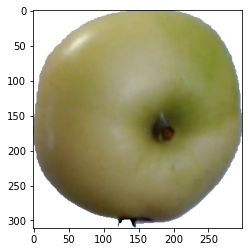

In [94]:
pict = Image.open(df_main['FullFileName'].iloc[80])
plt.imshow(pict)
plt.show()


In [95]:
a =df_main["Picture"].str.split("_", 1)
print('first : ',a[0][0], '    second : ',a[0][1])

first :  r0     second :  103.jpg


# EfficientNet
## fruits-360-original-size

In [96]:
# Add our data-augmentation parameters to ImageDataGenerator

train_dir = '.\\data\\fruits-360-original-size\\Training\\'
validation_dir = '.\\data\\fruits-360-original-size\\Validation\\'

train_datagen = ImageDataGenerator(rescale=1./255.)
                                  # , rotation_range=20, width_shift_range=0.1,
                                  # height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='categorical', target_size=(224, 224))

validation_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='categorical', target_size=(224, 224))

class_indices=train_generator.class_indices
class_indices

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


{'apple_6': 0,
 'apple_braeburn_1': 1,
 'apple_crimson_snow_1': 2,
 'apple_golden_1': 3,
 'apple_golden_2': 4,
 'apple_golden_3': 5,
 'apple_granny_smith_1': 6,
 'apple_hit_1': 7,
 'apple_pink_lady_1': 8,
 'apple_red_1': 9,
 'apple_red_2': 10,
 'apple_red_3': 11,
 'apple_red_delicios_1': 12,
 'apple_red_yellow_1': 13,
 'apple_rotten_1': 14,
 'cabbage_white_1': 15,
 'carrot_1': 16,
 'cucumber_1': 17,
 'cucumber_3': 18,
 'eggplant_violet_1': 19,
 'pear_1': 20,
 'pear_3': 21,
 'zucchini_1': 22,
 'zucchini_dark_1': 23}

In [97]:
#!pip install -U efficientnet
import efficientnet.tfkeras as efn
from tensorflow.keras import Model 
from keras.layers import Dropout, Flatten, Dense


base_model = efn.EfficientNetB0(input_shape=(
    224, 224, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = base_model.output
x = Flatten()(x)
#x = Dense(1024, activation="relu")(x)#inutile
x = Dropout(0.5)(x)# aléatoire à 0 proba 1/2

# Add a final sigmoid layer with 1 node for classification output : here 24 cat 
predictions = Dense(24, activation="softmax")(x)
model_final = Model( base_model.input,  predictions)


model_final.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

eff_history = model_final.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 30, workers=-2)


Epoch 1/30
100/100 [==============================] - 140s 1s/step - loss: 2.7636 - accuracy: 0.2190 - val_loss: 1.3813 - val_accuracy: 0.7023
Epoch 2/30
100/100 [==============================] - 137s 1s/step - loss: 1.3962 - accuracy: 0.5825 - val_loss: 0.6400 - val_accuracy: 0.9078
Epoch 3/30
100/100 [==============================] - 132s 1s/step - loss: 0.8117 - accuracy: 0.7730 - val_loss: 0.3524 - val_accuracy: 0.9563
Epoch 4/30
100/100 [==============================] - 132s 1s/step - loss: 0.4913 - accuracy: 0.8684 - val_loss: 0.2244 - val_accuracy: 0.9708
Epoch 5/30
100/100 [==============================] - 132s 1s/step - loss: 0.3831 - accuracy: 0.8930 - val_loss: 0.1520 - val_accuracy: 0.9836
Epoch 6/30
100/100 [==============================] - 135s 1s/step - loss: 0.2775 - accuracy: 0.9240 - val_loss: 0.1051 - val_accuracy: 0.9933
Epoch 7/30
100/100 [==============================] - 134s 1s/step - loss: 0.2100 - accuracy: 0.9475 - val_loss: 0.0764 - val_accuracy: 0.9942

In [98]:
model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                           

resource to save a model : https://www.tensorflow.org/tutorials/distribute/save_and_load

In [99]:
tf.saved_model.save(model_final, "model_orginal")


INFO:tensorflow:Assets written to: model_orginal\assets


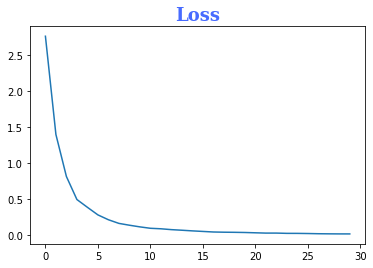

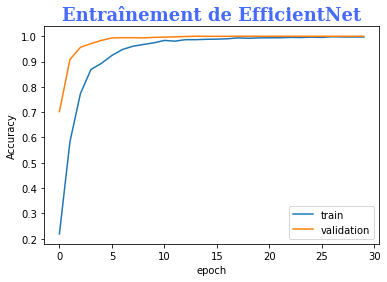

In [100]:
plt.plot(eff_history.history["loss"])
plt.title("Loss",fontdict=font_title)
plt.show()


plt.plot(eff_history.history["accuracy"],label='train')
plt.plot(eff_history.history["val_accuracy"],label='validation')
plt.title("Entraînement de EfficientNet",fontdict=font_title)
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

classe prédite :  pear_1 classe réelle :  pear_1


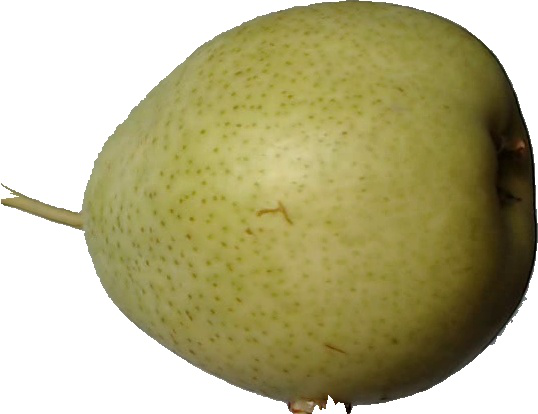

In [101]:
from keras.preprocessing.image import load_img, img_to_array

def load_perso_image_efn(path,dim = [224,224]):
    #load image from path and convert to array
    img = img_to_array(load_img(path, color_mode='rgb', interpolation='nearest'))
    #resize
    img = resize(img, dim)
    img=img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img=efn.preprocess_input(img)    
    return img

x=randrange(12455)
im=load_perso_image_efn(df_main['FullFileName'][x])

print("classe prédite : ", list(class_indices.keys())[model_final.predict(im).argmax()],
      "classe réelle : ", df_main['Target'][x])

load_img(df_main['FullFileName'][x])

In [102]:


df_main['prédiction']=df_main['FullFileName'].apply(lambda x :
                                        list(class_indices.keys())[model_final.predict(load_perso_image_efn(x)).argmax()])
df_main['prédiction']

0                apple_6
1                apple_6
2                apple_6
3                apple_6
4            apple_hit_1
              ...       
12450    zucchini_dark_1
12451    zucchini_dark_1
12452    zucchini_dark_1
12453    zucchini_dark_1
12454    zucchini_dark_1
Name: prédiction, Length: 12455, dtype: object

In [103]:
df_main['True']=df_main['Target'].apply(lambda x : class_indices[x])
df_main['True']

0         0
1         0
2         0
3         0
4         0
         ..
12450    23
12451    23
12452    23
12453    23
12454    23
Name: True, Length: 12455, dtype: int64

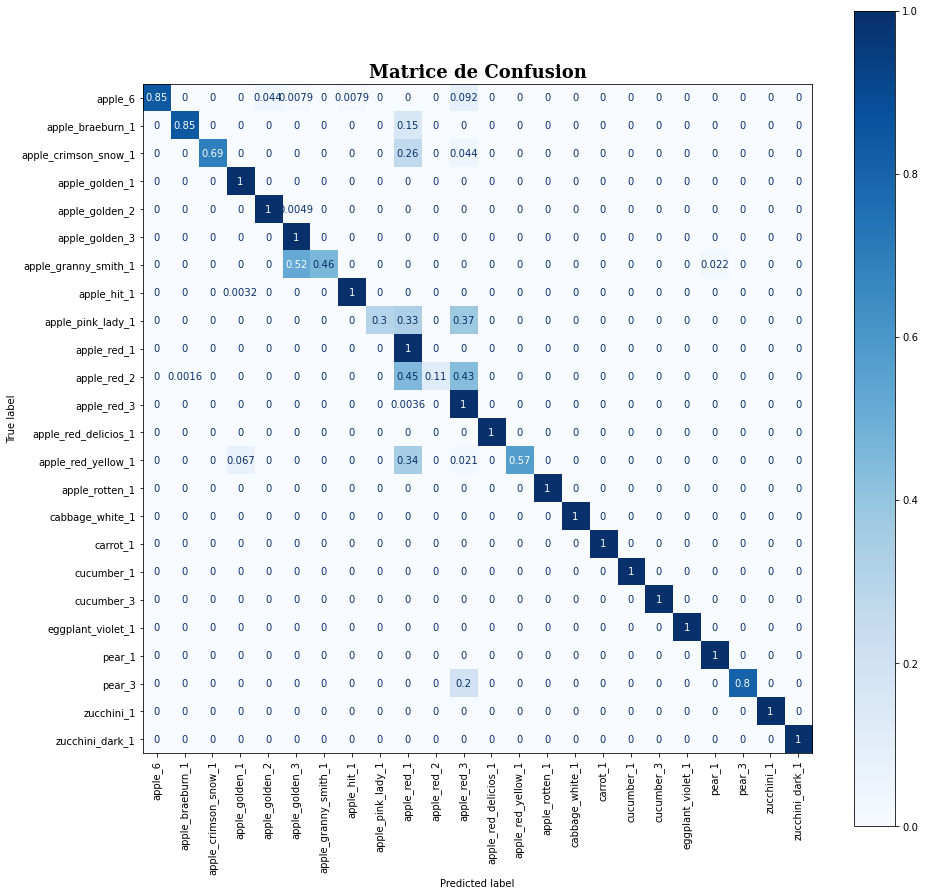

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay.from_predictions( df_main['Target'],df_main['prédiction'],normalize='true',cmap=plt.cm.Blues,ax=ax)


plt.xticks(rotation=90)
plt.title('Matrice de Confusion',fontdict=font_title,color='black')
plt.show()

## fruits-360_dataset

In [105]:
# Add our data-augmentation parameters to ImageDataGenerator

train_dir = '.\\data\\fruits-360_dataset\\fruits-360\\Training\\'
validation_dir = '.\\data\\fruits-360_dataset\\fruits-360\\Test\\'

train_datagen = ImageDataGenerator(rescale=1./255.)

test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='categorical', target_size=(224, 224))

validation_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='categorical', target_size=(224, 224))

class_indices=train_generator.class_indices

#load model
base_model = efn.EfficientNetB0(input_shape=(
    224, 224, 3), include_top=False, weights='imagenet')
#freeze du model
for layer in base_model.layers:
    layer.trainable = False
    

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x) #inutile
x = Dropout(0.5)(x)# aléatoire à 0 proba 1/2

# Add a final sigmoid layer with 1 node for classification output : here more 100 cat 
predictions = Dense(len(class_indices), activation="softmax")(x)
model_final = Model( base_model.input,  predictions)


model_final.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

eff_history = model_final.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 30, workers=-2)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/30
100/100 [==============================] - 620s 6s/step - loss: 4.4278 - accuracy: 0.1225 - val_loss: 3.1709 - val_accuracy: 0.4240
Epoch 2/30
100/100 [==============================] - 602s 6s/step - loss: 2.8095 - accuracy: 0.3980 - val_loss: 2.0563 - val_accuracy: 0.6063
Epoch 3/30
100/100 [==============================] - 595s 6s/step - loss: 1.8791 - accuracy: 0.5880 - val_loss: 1.4216 - val_accuracy: 0.7249
Epoch 4/30
100/100 [==============================] - 595s 6s/step - loss: 1.3437 - accuracy: 0.6870 - val_loss: 1.0909 - val_accuracy: 0.7708
Epoch 5/30
100/100 [==============================] - 595s 6s/step - loss: 0.9924 - accuracy: 0.7745 - val_loss: 0.8403 - val_accuracy: 0.8259
Epoch 6/30
100/100 [==============================] - 595s 6s/step - loss: 0.7245 - accuracy: 0.8320 - val_loss: 0.6992 - val_accuracy: 0.8483
Epoch 7/30
100/100 [==============================] 

In [106]:
tf.saved_model.save(model_final, "model_360")


INFO:tensorflow:Assets written to: model_360\assets


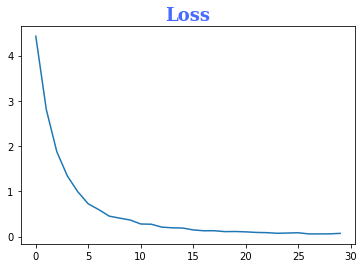

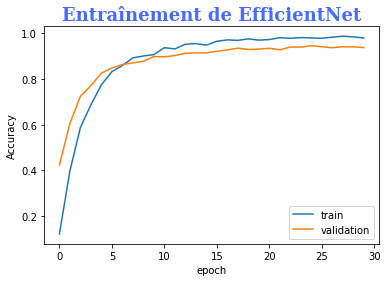

In [107]:
plt.plot(eff_history.history["loss"])
plt.title("Loss",fontdict=font_title)
plt.show()


plt.plot(eff_history.history["accuracy"],label='train')
plt.plot(eff_history.history["val_accuracy"],label='validation')
plt.title("Entraînement de EfficientNet",fontdict=font_title)
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:


df_fruits_360['prédiction']=df_fruits_360['FullFileName'].apply(lambda x :
                                        list(class_indices.keys())[model_final.predict(load_perso_image_efn(x)).argmax()])
df_fruits_360['prédiction']

0        Apple Braeburn
1        Apple Braeburn
2        Apple Braeburn
3        Apple Braeburn
4        Apple Braeburn
              ...      
90375        Watermelon
90376        Watermelon
90377        Watermelon
90378        Watermelon
90379        Watermelon
Name: prédiction, Length: 90380, dtype: object

In [109]:
fig, ax = plt.subplots(figsize=(150, 150))
cmp = ConfusionMatrixDisplay.from_predictions( df_fruits_360['Target'],df_fruits_360['prédiction'],normalize='true',cmap=plt.cm.Blues,ax=ax)


plt.xticks(rotation=90)
plt.title('Matrice de Confusion',fontdict=font_title,color='black')
plt.show()

In [110]:
df_fruits_360

FullFileName   Dataset  \
0      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
1      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
2      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
3      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
4      ./data/fruits-360_dataset/fruits-360/Test/Appl...      Test   
...                                                  ...       ...   
90375  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90376  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90377  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90378  ./data/fruits-360_dataset/fruits-360/Training/...  Training   
90379  ./data/fruits-360_dataset/fruits-360/Training/...  Training   

               Target       Picture  FileSize (in KB)      prédiction  
0      Apple Braeburn   321_100.jpg          4.722656  Apple Braeburn  
1      Apple Braeburn   322_100.jpg          4.659180  Apple Braeburn  
2      Apple Braeburn   323_100.jpg          4.688477  Apple Braeburn  
3      Apple Braeburn   324_100.jpg          4.673828  Apple Braeburn  
4      Apple Braeburn   325_100.jpg          4.643555  Apple Braeburn  
...               ...           ...               ...             ...  
90375      Watermelon   r_6_100.jpg          6.243164      Watermelon  
90376      Watermelon   r_7_100.jpg          6.128906      Watermelon  
90377      Watermelon  r_81_100.jpg          6.602539      Watermelon  
90378      Watermelon   r_8_100.jpg          6.198242      Watermelon  
90379      Watermelon   r_9_100.jpg          5.056641      Watermelon  

[90380 rows x 6 columns]

In [111]:
df_fruits_360['Target'][df_fruits_360['Dataset']=='Test']

0        Apple Braeburn
1        Apple Braeburn
2        Apple Braeburn
3        Apple Braeburn
4        Apple Braeburn
              ...      
22683        Watermelon
22684        Watermelon
22685        Watermelon
22686        Watermelon
22687        Watermelon
Name: Target, Length: 22688, dtype: object

In [112]:
def print_resultat_classifier( pred_train, pred_test, Y_train, Y_test):
    from sklearn import preprocessing
    import sklearn.metrics as metrics
    lb = preprocessing.LabelBinarizer()
    
    r = pd.DataFrame(index=[ 'accuracy_score'], columns=['train', 'test'],
                     data=[[  # Log Loss est de -1 * le log de la fonction de vraisemblance
                         
                         f'{metrics.accuracy_score(Y_train, pred_train):.2f}',
                           f'{metrics.accuracy_score(Y_test, pred_test):.2f}'
                           ]])
    r.index.name = 'score'
    return r

In [113]:
print_resultat_classifier(
    df_fruits_360['prédiction'][df_fruits_360['Dataset']=='Training'],
    df_fruits_360['prédiction'][df_fruits_360['Dataset']=='Test'],
    df_fruits_360['Target'][df_fruits_360['Dataset']=='Training'],
    df_fruits_360['Target'][df_fruits_360['Dataset']=='Test'])

train  test
score                     
accuracy_score  0.91  0.79

We can see a decorrelation of the measurements due to the fact that I distort the image when sending it in the predict

# AWS

In [119]:
import boto3 
s3=boto3.resource('s3')

In [120]:
for bucket in s3.buckets.all():
    print(bucket.name)


aws-logs-065394020639-eu-west-1
imagedefruit


In [121]:
petit_becket=s3.Bucket('imagedefruit')

## charger une image

In [122]:
for my_bucket_object in petit_becket.objects.all():
    print(my_bucket_object)


s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_11.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_199.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_203.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_207.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_211.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_215.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_219.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Test/apple_6/r0_227.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imag

s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_146.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_148.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_150.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_152.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_154.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_156.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_158.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_16.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='LiteClasse/imagedefruit_6classes/Training/pear_1/r1_160

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_159.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_163.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_167.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_171.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_175.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_179.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_183.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golden_2/r1_187.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_golde

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r0_91.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r0_95.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r0_99.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r1_103.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r1_107.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r1_11.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r1_111.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r1_115.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/apple_red_2/r1_119.jpg')
s3.ObjectSumma

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_127.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_131.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_135.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_139.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_143.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_147.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_15.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_151.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Test/pear_1/r0_155.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/f

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_6.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_60.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_62.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_64.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_66.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_68.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_70.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_braeburn_1/r1_72.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fr

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_178.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_18.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_180.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_182.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_184.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_186.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_188.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_golden_3/r0_190.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_266.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_268.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_270.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_272.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_274.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_276.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_278.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_hit_1/r2_28.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_0.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_10.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_102.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_104.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_106.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_108.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_red_3/r0_110.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/ap

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_298.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_30.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_300.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_302.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_304.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_306.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_308.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/apple_rotten_1/r0_310.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_114.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_116.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_118.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_12.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_120.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_122.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_124.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_126.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Training/pear_1/r1_128.jpg')
s3.ObjectSummary(buc

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_49.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_5.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_53.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_57.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_61.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_65.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_69.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_73.jpg')
s3.Object

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/232_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/233_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/234_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/235_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/236_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/237_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/238_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Rainier/239_100.jpg')
s3.ObjectSummary

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_299_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_29_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_2_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_300_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_301_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_302_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_303_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/r_3

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/r_38_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/r_39_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/r_3_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/r_47_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/r_48_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/r_50_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/r_51_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cherry Wax Yellow/

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/115_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/116_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/117_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/118_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/119_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/11_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/120_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Cucumber Ripe/121_100.jpg')
s3.ObjectSummary(bucket_n

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/247_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/248_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/249_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/24_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/250_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/251_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/252_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Blue/253_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key=

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/237_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/238_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/239_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/23_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/240_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/241_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/242_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape Pink/243_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key=

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/286_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/287_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/288_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/289_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/28_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/290_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/291_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Grape White/292_100.jpg')
s3.ObjectSummary(bucket_name='imagedefrui

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/43_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/45_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/46_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/47_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/48_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/4_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/50_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Hazelnut/51_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/91_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/92_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/93_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/94_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/95_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/96_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/97_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/98_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Kaki/99_10

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_10_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_110_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_111_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_112_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_113_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_114_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_115_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Limes/r_116_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_145_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_146_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_147_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_148_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_149_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_14_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_150_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mandarine/r_151_100.jpg')
s3.ObjectSummary(bucket_name='imagedefrui

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/144_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/145_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/146_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/147_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/148_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/149_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/14_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Mulberry/150_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/169_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/16_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/170_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/171_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/172_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/173_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/174_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Nectarine/175_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fr

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/231_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/232_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/233_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/234_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/235_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/236_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/237_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Orange/238_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/317_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/318_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/319_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/31_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/320_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/321_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/322_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Passion Fruit/323_100.jpg')
s3.ObjectSummary(bucket_n

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_76_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_77_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_78_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_79_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_7_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_80_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_81_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear 2/r_82_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_152_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_156_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_157_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_161_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_162_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_163_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_164_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pear Forelle/r_165_100.jpg')
s3.ObjectSummary

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/136_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/137_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/138_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/139_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/13_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/140_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/141_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Green/142_100.jpg')
s3.ObjectSummary(bucket_name='ima

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_219_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_21_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_220_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_221_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_222_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_223_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_224_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pepper Orange/r_225_100.jpg')
s3.Object

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/41_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/42_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/43_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/44_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/45_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/46_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/47_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pineapple Mini/48_100.jpg')
s3.ObjectSummary(bucket_

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/18_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/190_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/191_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/192_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/193_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/194_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/195_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 2/196_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_71_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_72_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_73_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_74_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_75_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_76_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_77_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Plum 3/r3_78_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-36

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_163_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_164_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_165_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_166_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_167_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_168_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_169_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Pomegranate/r_16_100.jpg')
s3.ObjectSummary(bucket_n

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red Washed/r_151_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red Washed/r_152_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red Washed/r_153_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red Washed/r_154_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red Washed/r_155_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red Washed/r_156_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red Washed/r_157_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato Red

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/118_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/119_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/122_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/123_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/124_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/125_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/126_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Potato White/127_100.jpg')
s3.ObjectSummary(bucket_name='im

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/220_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/221_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/222_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/223_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/224_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/225_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/226_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Rambutan/227_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-36

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/174_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/175_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/176_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/177_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/178_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/179_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/17_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Redcurrant/180_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key=

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/239_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/23_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/240_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/241_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/242_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/243_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/244_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry Wedge/245_100.jpg')
s

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_204_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_205_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_206_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_207_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_208_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_209_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_20_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Strawberry/r_210_100.jpg')
s3.ObjectSummary(bucket_name='ima

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_272_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_275_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_276_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_277_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_27_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_28_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_290_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tangelo/r_291_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fru

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/75_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/76_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/77_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/78_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/79_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/7_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/80_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 2/81_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_88_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_89_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_90_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_91_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_92_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_93_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_94_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_95_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_115_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_116_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_117_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_118_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_119_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_11_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_120_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Cher

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/185_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/187_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/188_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/189_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/18_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/190_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/191_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato Maroon/192_100.jpg')
s3.ObjectSummary(bucket_n

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato not Ripened/r_124_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato not Ripened/r_125_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato not Ripened/r_126_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato not Ripened/r_127_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato not Ripened/r_128_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato not Ripened/r_129_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Tomato not Ripened/r_12_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Toma

s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/167_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/168_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/169_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/16_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/170_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/171_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/172_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key='data/fruits-360_dataset/fruits-360/Training/Watermelon/173_100.jpg')
s3.ObjectSummary(bucket_name='imagedefruit', key=

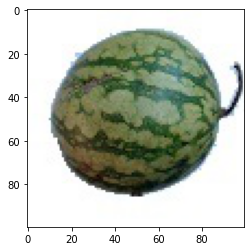

In [80]:
import matplotlib.image as mpimg

#my_bucket_object.get('data/fruits-360_dataset/fruits-360/Training/Watermelon/r_9_100.jpg')
object = bucket.Object('data/fruits-360_dataset/fruits-360/Training/Watermelon/r_9_100.jpg')
object.download_file('r_9_100.jpg')

img=mpimg.imread('r_9_100.jpg')
imgplot = plt.imshow(img)
plt.show(imgplot)

## charger le paquet de traitement d'image local

In [117]:
import pandas as pd
filename = "./data/part-00000-062ea821-9c07-4048-be70-83b6595696f8-c000.snappy.parquet"
df = pd.read_parquet(filename)
df.head(5)

path  \
0  s3a://imagedefruit/imagedefruit_5_5/All/pear_1...   
1  s3a://imagedefruit/imagedefruit_5_5/All/pear_1...   
2  s3a://imagedefruit/imagedefruit_5_5/All/pear_1...   
3  s3a://imagedefruit/imagedefruit_5_5/All/pear_1...   
4  s3a://imagedefruit/imagedefruit_5_5/All/pear_1...   

                                            features  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

## charger le paquet de traitement d'image de s3

In [144]:
df_prediction=pd.DataFrame()
for i,key in enumerate(petit_becket.objects.filter(Prefix='ml/prediction/')):
    if i :
        print(key.key)
        object =bucket.Object(key.key)
        object.download_file('data/ml/prediction/1.parquet')
        df_=pd.read_parquet('data/ml/prediction/1.parquet')
        df_prediction= pd.concat([df_prediction,df_], ignore_index=True)

ml/prediction/part-00000-e35053a7-1834-46b1-a0fe-f0f877a6f0d4-c000.snappy.parquet
ml/prediction/part-00001-e35053a7-1834-46b1-a0fe-f0f877a6f0d4-c000.snappy.parquet
ml/prediction/part-00002-e35053a7-1834-46b1-a0fe-f0f877a6f0d4-c000.snappy.parquet
ml/prediction/part-00003-e35053a7-1834-46b1-a0fe-f0f877a6f0d4-c000.snappy.parquet


In [145]:
df_prediction

Target                                           features  \
0             apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
1             apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
2            carrot_1  {'type': 1, 'size': None, 'indices': None, 'va...   
3            carrot_1  {'type': 1, 'size': None, 'indices': None, 'va...   
4   eggplant_violet_1  {'type': 1, 'size': None, 'indices': None, 'va...   
5   eggplant_violet_1  {'type': 1, 'size': None, 'indices': None, 'va...   
6              pear_1  {'type': 1, 'size': None, 'indices': None, 'va...   
7              pear_1  {'type': 1, 'size': None, 'indices': None, 'va...   
8          zucchini_1  {'type': 1, 'size': None, 'indices': None, 'va...   
9             apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
10            apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
11  eggplant_violet_1  {'type': 1, 'size': None, 'indices': None, 'va...   
12  eggplant_violet_1  {'type': 1, 'size': None, 'indices': None, 'va...   
13             pear_1  {'type': 1, 'size': None, 'indices': None, 'va...   
14             pear_1  {'type': 1, 'size': None, 'indices': None, 'va...   
15         zucchini_1  {'type': 1, 'size': None, 'indices': None, 'va...   
16         zucchini_1  {'type': 1, 'size': None, 'indices': None, 'va...   
17            apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
18            apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
19           carrot_1  {'type': 1, 'size': None, 'indices': None, 'va...   
20           carrot_1  {'type': 1, 'size': None, 'indices': None, 'va...   
21  eggplant_violet_1  {'type': 1, 'size': None, 'indices': None, 'va...   
22             pear_1  {'type': 1, 'size': None, 'indices': None, 'va...   
23             pear_1  {'type': 1, 'size': None, 'indices': None, 'va...   
24         zucchini_1  {'type': 1, 'size': None, 'indices': None, 'va...   
25         zucchini_1  {'type': 1, 'size': None, 'indices': None, 'va...   
26            apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
27            apple_6  {'type': 1, 'size': None, 'indices': None, 'va...   
28           carrot_1  {'type': 1, 'size': None, 'indices': None, 'va...   
29           carrot_1  {'type': 1, 'size': None, 'indices': None, 'va...   
30  eggplant_violet_1  {'type': 1, 'size': None, 'indices': None, 'va...   
31         zucchini_1  {'type': 1, 'size': None, 'indices': None, 'va...   
32         zucchini_1  {'type': 1, 'size': None, 'indices': None, 'va...   

    Target_number                                       pca_features  \
0               1  {'type': 1, 'size': None, 'indices': None, 'va...   
1               1  {'type': 1, 'size': None, 'indices': None, 'va...   
2               2  {'type': 1, 'size': None, 'indices': None, 'va...   
3               2  {'type': 1, 'size': None, 'indices': None, 'va...   
4               5  {'type': 1, 'size': None, 'indices': None, 'va...   
5               5  {'type': 1, 'size': None, 'indices': None, 'va...   
6               4  {'type': 1, 'size': None, 'indices': None, 'va...   
7               4  {'type': 1, 'size': None, 'indices': None, 'va...   
8               3  {'type': 1, 'size': None, 'indices': None, 'va...   
9               1  {'type': 1, 'size': None, 'indices': None, 'va...   
10              1  {'type': 1, 'size': None, 'indices': None, 'va...   
11              5  {'type': 1, 'size': None, 'indices': None, 'va...   
12              5  {'type': 1, 'size': None, 'indices': None, 'va...   
13              4  {'type': 1, 'size': None, 'indices': None, 'va...   
14              4  {'type': 1, 'size': None, 'indices': None, 'va...   
15              3  {'type': 1, 'size': None, 'indices': None, 'va...   
16              3  {'type': 1, 'size': None, 'indices': None, 'va...   
17              1  {'type': 1, 'size': None, 'indices': None, 'va...   
18              1  {'type': 1, 'size': None, 'indices': None, 

In [147]:
df_prediction['pca_features'][0]['values']

array([-54.96446728, -56.252818  ,  61.64840157, -43.68549857,
        24.81984149,   7.59768214,   2.43542932,  20.87136518,
        19.19868867,  10.28619463])

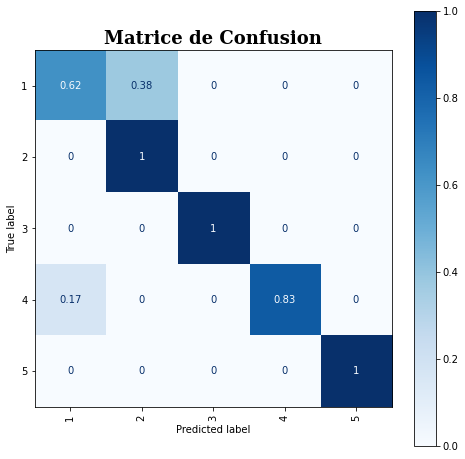

In [149]:
fig, ax = plt.subplots(figsize=(8, 8))
cmp = ConfusionMatrixDisplay.from_predictions( df_prediction['Target_number'],df_prediction['prediction'],normalize='true',cmap=plt.cm.Blues,ax=ax)


plt.xticks(rotation=90)
plt.title('Matrice de Confusion',fontdict=font_title,color='black')
plt.show()

In [ ]:
# import col and when modules
from pyspark.sql.functions import  when
  
# map college name with colege number
# using with column method along with when module
features_df.withColumn("Target_number", 
                      when(col("Target")=='apple_6', 1)
                     .when(col("Target")=='carrot_1', 2)
                     .when(col("Target")=='zucchini_1', 3)
                     .when(col("Target")=='pear_1', 4)
                     .otherwise(5)).show()

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA

# used vector assembler to create the input the vector 
vectorAssembler = VectorAssembler(inputCols=['inputCol1', 'inputCol2', 'inputCol3', 'inputCol4'], outputCol='pcaInput')

df = vectorAssembler.transform(dataset) # fetch data into vector assembler
pca = PCA(k=8, inputCol="pcaInput", outputCol="features") # here I Have defined maximum number of features that I have
pcaModel = pca.fit(df) # fit the data to pca to make the model
print(pcaModel.explainedVariance) # here it will explain the variances
cumValues = pcaModel.explainedVariance.cumsum() # get the cumulative values
# plot the graph 
plt.figure(figsize=(10,8))
plt.plot(range(1,9), cumValues, marker = 'o', linestyle='--')
plt.title('variance by components')
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')